In [2]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt 

In [3]:
#setup

v = 1.5
gamma = 2
lamda = 2
omega = 1 

n = 1000

In [4]:
num_simulations = 1000

p_c_s = []
p_c_rd = []
p_equals = []


for sim in np.arange(num_simulations): 
    
    # step 1 & 2
    u_1 = []
    u_2 = []

    for i in np.arange(n):
        u_1.append(random.randrange(0, 10000, 1))
        u_2.append(random.randrange(0, 10000, 1))

    d = {'u_1': u_1, 'u_2': u_2}
    df = pd.DataFrame(data=d)

    df["p"] = df["u_1"].rank(ascending=False) 
    df["c_0"] = df["u_2"].rank(ascending=False) 
    
    #step 3
    e_s = v**(1/gamma)
    e_1 = ((1+omega)*v)**(1/gamma)
    e_2 = ((1 + (omega * lamda)) * v)**(1/gamma)

    df['I'] = (df['c_0'] >= df['p']).astype(int)

    #step 4
    df['u_s'] = df['c_0'] - e_s
    df['c_s'] = df['u_s'].rank(ascending=True)

    conditions = [
        (df['c_0'] - e_2) < df['p'],
        (df['c_0'] - e_1) >= df['p'],
        ((df['c_0'] - e_2) > df['p']) & ((df['c_0'] - e_1) < df['p'])
    ]

    choices = [df['c_0'] - e_2, df['c_0'] - e_1, df['p']]

    df['u_rd'] = np.select(conditions, choices)
    df['c_rd'] = df['u_rd'].rank(ascending=True)
    
    #step 5
    p_c_s.append(df['p'].corr(df['c_s']))
    p_c_rd.append(df['p'].corr(df['c_rd']))
    
    p_equals.append(sum((df['p'] == df['c_s']) & (df['p'] == df['c_rd'])))

In [5]:
df.loc[df['c_0'] - e_2 < df['p']]

,u_1,u_2,p,c_0,I,u_s,c_s,u_rd,c_rd
1,210,860,975.0,914.0,0,912.775255,914.0,911.87868,914.0
3,5420,6615,476.0,332.0,0,330.775255,332.0,329.87868,332.0
4,3793,4329,617.0,578.0,0,576.775255,578.0,575.87868,578.0
5,6003,8816,416.0,112.0,0,110.775255,112.0,109.87868,112.0
6,2606,6884,741.0,304.0,0,302.775255,304.0,301.87868,304.0
7,148,8598,981.0,132.0,0,130.775255,132.0,129.87868,132.0
10,2536,6715,752.0,322.5,0,321.275255,322.5,320.37868,322.5
15,6154,8971,401.0,98.0,0,96.775255,98.0,95.87868,98.0
17,1392,2619,871.0,751.0,0,749.775255,751.0,748.87868,751.0
21,188,6492,976.0,351.0,0,349.775255,351.0,348.87868,351.0


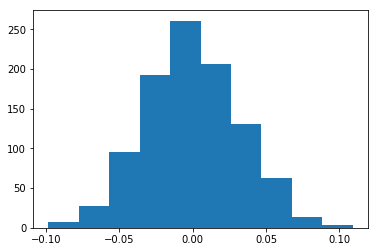

In [6]:
plt.hist(p_c_s) 
plt.show()

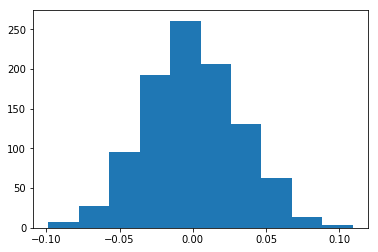

In [7]:
plt.hist(p_c_rd)
plt.show()

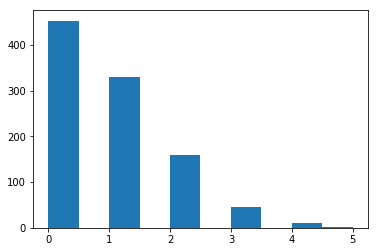

In [8]:
plt.hist(p_equals)
plt.show()

## Percentile Comparison

In [11]:
bottom = 0.5
top = 0.25

In [32]:
df['p_percentile'] = (df['p'].rank(pct = True))
df['c_percentile'] = (df['c_rd'].rank(pct = True))

percent_upwards = len(df.loc[(df['p_percentile'] > bottom) & (df['c_percentile'] <= top)]) / len(df) * 100 
percent_downwards = len(df.loc[(df['p_percentile'] <= top) & (df['c_percentile'] > bottom)]) / len(df) * 100